# 2D Optimization

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 16})
from matplotlib import cm
import pandas as pd
from scipy.optimize import minimize

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/bike.csv")

$$loss(\mu, \sigma | x) = N * \log{\sigma} + \frac{1}{2\sigma^2} * \sum_{n=1}^N (y_n - \mu)^2$$

In [14]:
data = {
    "N": df["cnt"].size, 
    "y": df["cnt"]
}

def loss(theta, data):
    one = data["N"] * np.log(theta[1])
    two = 0.5 * np.sum((data["y"] - theta[0]) ** 2) / theta[1] ** 2
    return one + two

In [15]:
mn = np.mean(data["y"])
sd = np.std(data["y"])
[mn, sd]

[4504.3488372093025, 1935.8859561152221]

In [16]:
mu_min, mu_max = 3500, 5500
sigma_min, sigma_max = 1500, 3000
mu = np.linspace(mu_min, mu_max, 100)
sigma = np.linspace(sigma_min, sigma_max, 100)
m, s = np.meshgrid(mu, sigma)

In [17]:
z = [loss([m, s], data) for m,s in zip(m.flatten(), s.flatten())]
l = np.asarray(z).reshape(np.shape(m))

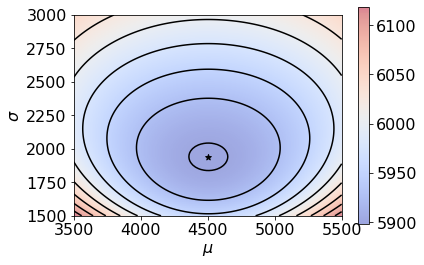

In [18]:
plt.contour(m, s, l, 9, colors = "black");
plt.imshow(l, extent = [mu_min, mu_max, sigma_min, sigma_max], 
           origin = "lower",
           cmap = cm.coolwarm, 
           alpha = 0.5);
plt.colorbar();
plt.scatter([mn], [sd],
           color = "black", marker = "*");
plt.xlabel("$\mu$");
plt.ylabel("$\sigma$");

In [19]:
minimize(loss, np.random.exponential(size = 2),
         args = (data),
         bounds = [(-np.inf, np.inf), (0, np.inf)],
         method = "L-BFGS-B")

      fun: 5897.942183502328
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 168
      nit: 48
     njev: 56
   status: 0
  success: True
        x: array([4504.26791768, 1935.84450478])

In [20]:
[mn, sd]

[4504.3488372093025, 1935.8859561152221]